In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Loading and Preprocessing Of Data

In [2]:
file_path = 'D:\Entri Assignments\CarPrice_Dataset.csv'
df = pd.read_csv(file_path)

In [3]:
print("Initial Data Overview:")
print(df.info())
print(df.describe())



Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205

### Handling Missing Values

In [4]:
df.dropna(inplace=True)

### Encoding Categorical Variables

In [5]:
df = pd.get_dummies(df, drop_first=True)

### Splitting Data

In [6]:
X = df.drop(columns=['price'])  # Assuming 'price' is the target variable
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.Model Implementation

In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {"R2 Score": r2, "MSE": mse, "MAE": mae}

# 3. Model Performance Comparison

In [9]:
results_df = pd.DataFrame(results).T
print("\nModel Performance:")
print(results_df)


Model Performance:
                              R2 Score           MSE           MAE
Linear Regression        -3.179554e+21  2.510068e+29  2.386524e+14
Decision Tree             8.844517e-01  9.121850e+06  1.981114e+03
Random Forest             9.526045e-01  3.741588e+06  1.398783e+03
Gradient Boosting         9.332131e-01  5.272426e+06  1.643254e+03
Support Vector Regressor -1.017173e-01  8.697400e+07  5.705061e+03


## Feature Importance Analysis

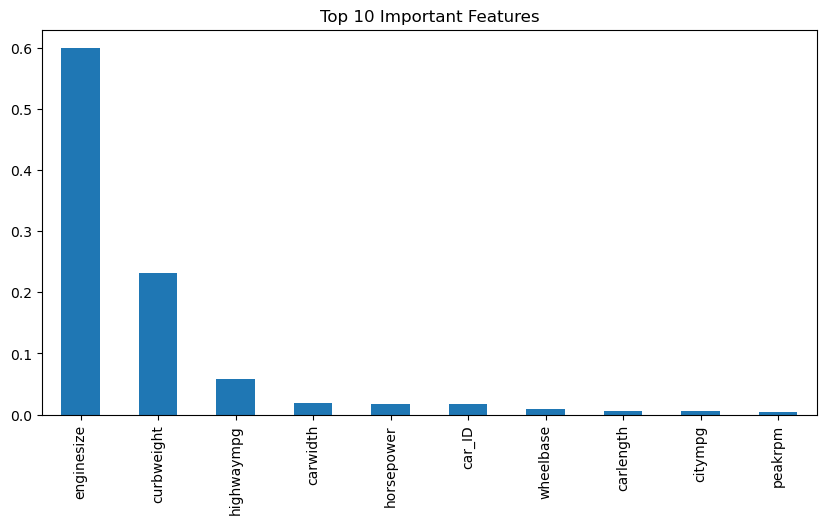

In [10]:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 5))
feature_importances[:10].plot(kind='bar')
plt.title('Top 10 Important Features')
plt.show()

## Hyperparameter Tuning for RandomForestRegressor

In [13]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score after Tuning:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best R2 Score after Tuning: 0.8766766606663746
